#Preprocessing data in the form of CSV files and performing classification of movie reviews as Positive and Negative reviews based on sentiment analysis and trying various different ML models and comapring performance metrics.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Before we Proceed to build our model,It is a good idea to have a look at the data we are working with and also make sure we remove duplicate and NaN values.

In [11]:
# reading two csv files
import pandas as pd
train_df=pd.read_csv('/content/drive/MyDrive/movie.csv')
print("First 5 elements of the dataset:\n")
print(train_df.head())
print("\n\n")
#It is given 0 is negative and 1 is positive sentiment
print("Number of reviews:",len(train_df))
print("\n\n")
print("Number of positive and negative sentiment reviews:\n",train_df["label"].value_counts())
#check whether there are any missing values
print("Check if there are any NaN values:\n")
print(train_df.isna().sum())#No NaN values hence we shall proceed

First 5 elements of the dataset:

                                                text  label
0  I grew up (b. 1965) watching and loving the Th...      0
1  When I put this movie in my DVD player, and sa...      0
2  Why do people who do not know what a particula...      0
3  Even though I have great interest in Biblical ...      0
4  Im a die hard Dads Army fan and nothing will e...      1



Number of reviews: 40000



Number of positive and negative sentiment reviews:
 0    20019
1    19981
Name: label, dtype: int64


text     0
label    0
dtype: int64

#For more randomised training data we will shuffle the training data so that the model does not get biased based on training data order.

In [12]:
train_df_shuffled=train_df.sample(frac=1,random_state=42)

In [13]:
#train dataset
train_df_shuffled.head()

,text,label
32823,The central theme in this movie seems to be co...,0
16298,"An excellent example of ""cowboy noir"", as it's...",1
28505,The ending made my heart jump up into my throa...,0
6689,Only the chosen ones will appreciate the quali...,1
26893,"This is a really funny film, especially the se...",1


In [16]:
#number of examples in each class
train_df_shuffled.label.value_counts()

0    20019
1    19981
Name: label, dtype: int64

#Using the train_test_split from sklearn we split the training dataset into testing and validating dataset and we will have validation data size as 10 percent of the training data

In [17]:
#split data into training and validation datasets
from sklearn.model_selection import train_test_split
train_sentences,val_sentences,train_labels,val_labels=train_test_split(train_df_shuffled["text"].to_numpy(),
                                                                       train_df_shuffled["label"].to_numpy(),
                                                                       test_size=0.1,
                                                                       random_state=42)

In [18]:
#check the lengths
len(train_sentences),len(val_sentences),len(train_labels),len(val_labels)

(36000, 4000, 36000, 4000)

#We tokenize for convert the text to numbers using the CountVectorizer which returns a sparse matrix and also use the tfid Transformer from the feature extraction library to get a effective representation of textual reviews to numbers for our ML model to learn on

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect=CountVectorizer()
train_vectorized=count_vect.fit_transform(train_sentences)

In [20]:
from sklearn.feature_extraction.text import TfidfTransformer
tf_transformer=TfidfTransformer(use_idf=False).fit(train_vectorized)
train_tf=tf_transformer.transform(train_vectorized)

#The first model we will use for classifying the movie reviews is the classic naive bayes classifier which is normally a good starting point for classification problems

In [21]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
model_0=Pipeline([
    ('vect', CountVectorizer()),
    ("tfisf",TfidfTransformer()),
    ("clf",MultinomialNB())
])
model_0.fit(train_sentences,train_labels)

Pipeline(steps=[('vect', CountVectorizer()), ('tfisf', TfidfTransformer()),
                ('clf', MultinomialNB())])

In [22]:
#Evaluate model 0
model_0_score=model_0.score(val_sentences,val_labels)
model_0_score

0.852

In [23]:
#Make predictions
model_0_preds=model_0.predict(val_sentences)
model_0_preds[:20]

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1])

In [24]:
train_labels[:20]

array([0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1])

In [25]:
#function to evaluate a model based on accuracy,precision,recall and F1-score
from sklearn.metrics import accuracy_score,precision_recall_fscore_support
def calculate_results(y_true,y_preds):
  model_accuracy=accuracy_score(y_true,y_preds)
  #calculating model precison,recall and f1 score using weighted average
  model_precision,model_recall,model_f1,_=precision_recall_fscore_support(y_true,y_preds,average="weighted")
  model_results={"accuracy":model_accuracy,
                 "precision":model_precision,
                 "recall":model_recall,
                 "f1":model_f1}
  return model_results

In [26]:
#get baseline model results
model_0_results=calculate_results(val_labels,model_0_preds)
model_0_results

{'accuracy': 0.852,
 'precision': 0.85301153108443,
 'recall': 0.852,
 'f1': 0.8519287876275655}

#The second model we are going to check on is a basic logistic Regression model which can be used for classification problems as well

In [27]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression(random_state=42)

model_1=Pipeline([
     ('vect',CountVectorizer()),
     ('tfidf',TfidfTransformer()),
     ('clf',LogisticRegression(random_state=42)),
])
model_1.fit(train_sentences,train_labels)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(random_state=42))])

In [28]:
#Evaluate model 1
model_1_score=model_1.score(val_sentences,val_labels)
model_1_score

0.89775

In [29]:
model_1_preds=model_1.predict(val_sentences)
model_1_preds[:20]

array([1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1])

In [30]:
model_1_results=calculate_results(val_labels,model_1_preds)
model_1_results

{'accuracy': 0.89775,
 'precision': 0.8980739626298403,
 'recall': 0.89775,
 'f1': 0.8977164262069989}

#The third Model we are going to use is a Multi Layer perceptron (MLP) classifier from the sklearn neural netwroks library

In [31]:
from sklearn.neural_network import MLPClassifier
clf=MLPClassifier(max_iter=10,random_state=42)
model_2= Pipeline([
    ('vect',CountVectorizer()),
    ('tfidf',TfidfTransformer()),
    ('clf', MLPClassifier(max_iter=5)),
])
model_2.fit(train_sentences,train_labels)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:693: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', MLPClassifier(max_iter=5))])

In [32]:
model_2_score=model_2.score(val_sentences,val_labels)
model_2_score

0.899

In [33]:
model_2_preds=model_2.predict(val_sentences)
model_2_preds[:20]

array([1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1])

In [34]:
model_2_results=calculate_results(val_labels,model_2_preds)
model_2_results

{'accuracy': 0.899,
 'precision': 0.8996370536164509,
 'recall': 0.899,
 'f1': 0.8989763625962139}

#Compare performance of each of our models by combine model results into a dataframe

In [40]:
all_models_results=pd.DataFrame({"1.Naive Bayes":model_0_results,
                                 "2.Logistic Regression":model_1_results,
                                 "3.MLP classifier":model_2_results})
all_models_results=all_models_results.transpose()

Tabular representation of ML models

In [41]:
all_models_results

,accuracy,precision,recall,f1
1.Naive Bayes,0.85200,0.853012,0.85200,0.851929
2.Logistic Regression,0.89775,0.898074,0.89775,0.897716
3.MLP classifier,0.89900,0.899637,0.89900,0.898976


#Plotting F1 scores,accuracy,recall and precision for a visual comparison

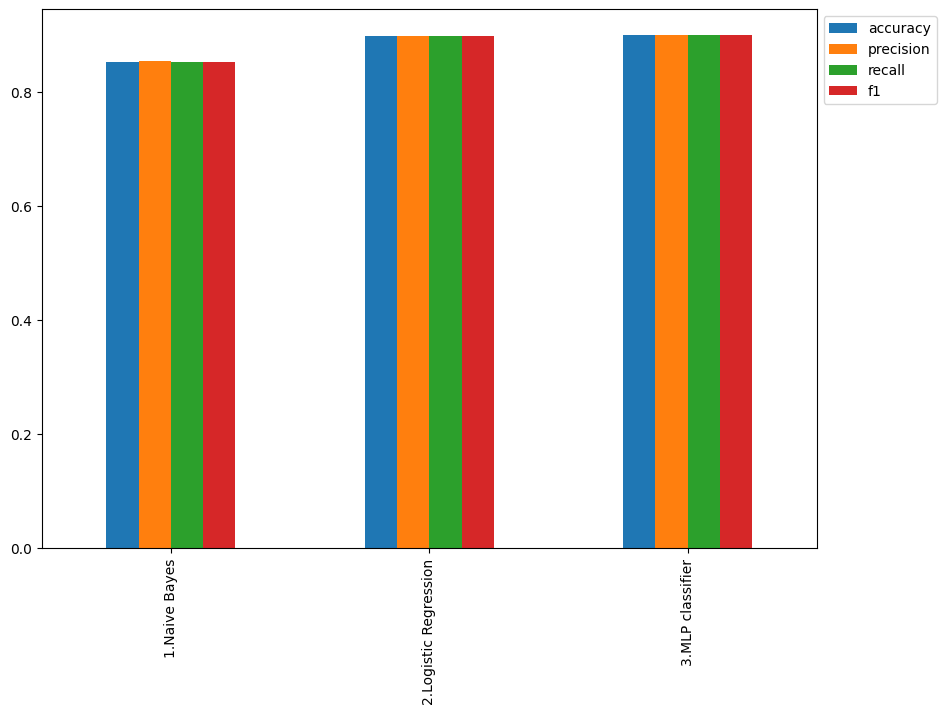

In [42]:
all_models_results.plot(kind="bar",figsize=(10,7)).legend(bbox_to_anchor=(1.0,1.0))

Sorting our models results by f1 scores to decide which is the best model

<Axes: >

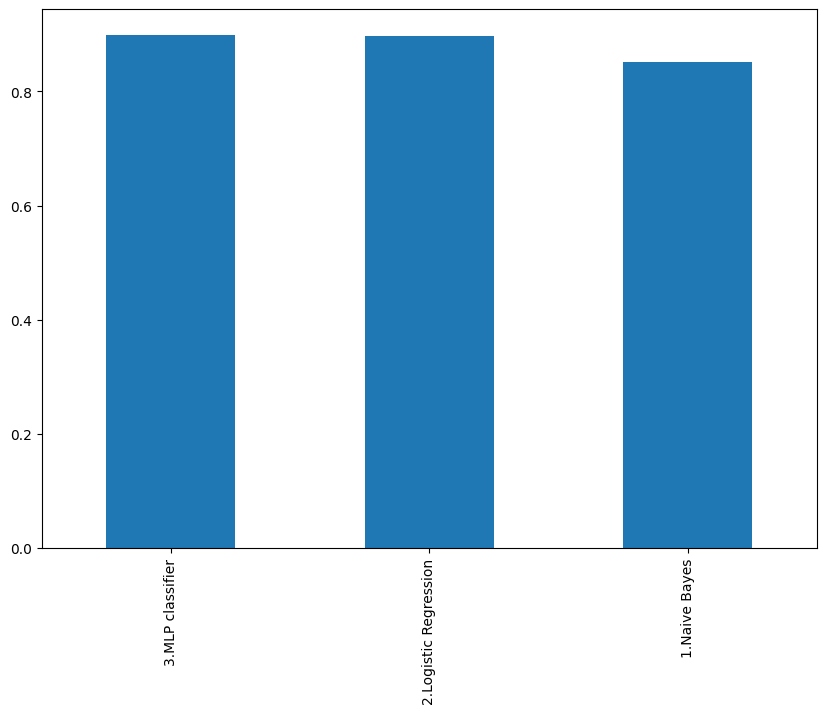

In [43]:
all_models_results.sort_values("f1",ascending=False)["f1"].plot(kind="bar",figsize=(10,7))

#making a confusion matrix for the best performing model(MLP classifier)

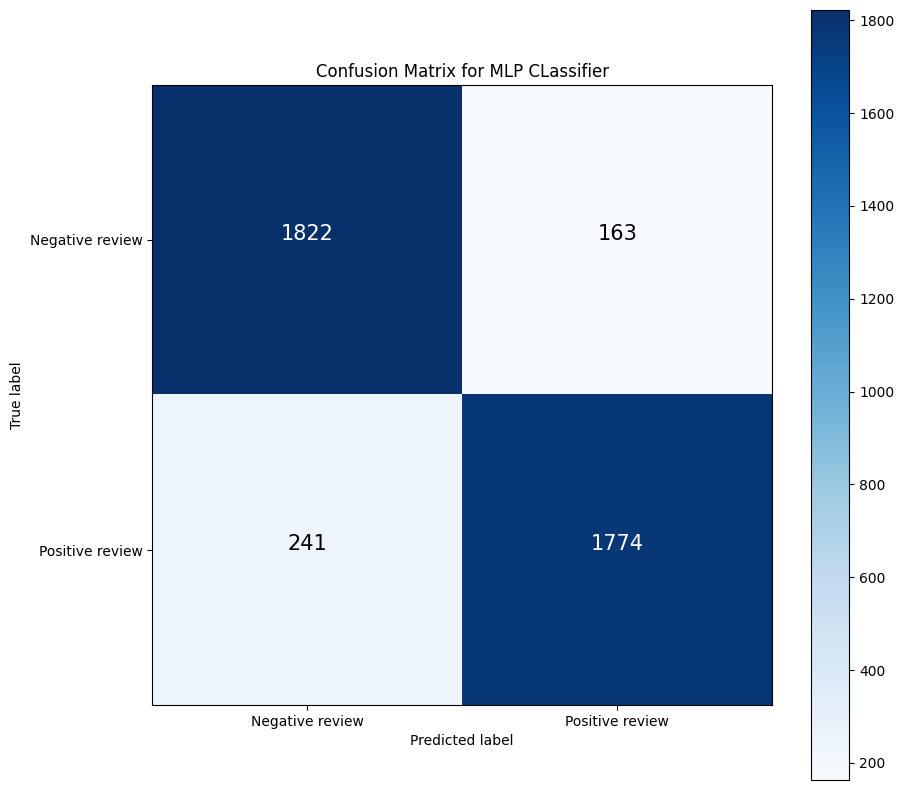

In [39]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools
cm=confusion_matrix(val_labels,model_2_preds)
n_classes=cm.shape[0]

fig,ax=plt.subplots(figsize=(10, 10))
cax=ax.matshow(cm,cmap=plt.cm.Blues)
fig.colorbar(cax)
labels=np.array(["Negative review","Positive review"])

ax.set(title="Confusion Matrix for MLP CLassifier",xlabel="Predicted label",ylabel="True label",xticks=np.arange(n_classes),yticks=np.arange(n_classes), xticklabels=labels, yticklabels=labels)
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

threshold=(cm.max()+cm.min())/2.

for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j,i,f"{cm[i,j]}",horizontalalignment="center",color="white" if cm[i,j]>threshold else "black",size=15)